# Data Cleaning
* [Missing Data](#missing)
* [duplicates](#dup)
* [Outliers](#out)
* [Inconsistent Data](#in)
* [Incorrect Data Type and Data type casting](#data)
* [Normalization & Scaling](#norm)
* [Categorical Values](#cat)
* [Strings](#string)
* [Data Binning](#bin)
* [Feature Engineering](#feature)
* [Data Encoding Issues](#encoding_issues)
* [Data Aggregation and Grouping](#agg)
* [Multicollinearity](#multi)
* [Date and Time Data](#date)
* [Data Merging and Joining](#merge)
* [Sparse Data](#sparse)

In [1]:
import pandas as pd

In [2]:
df_org = pd.read_csv("dataset/titanic.csv")

In [3]:
df_org.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_org.index = df_org.index + 1

In [5]:
df_org.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
duplicate_passengers_id = df_org[df_org["PassengerId"].duplicated()]

In [7]:
duplicate_passengers_id

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Dropping passengerid column as its meaningless

In [8]:
df = df_org.copy()
df = df.drop("PassengerId",axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Missing data<a id="missing"></a>

Check number of missing values using info -> to know number of non null values and the data type </br>
Or isnull().sum -> to know the total number of null values in each column

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Drop the rows that have missing values 
Not best practice it will delete rows if any null values exist. so we would lose info that exist in other columns

In [11]:
df_dropped_rows = df.dropna(axis = 0, inplace =False)
df_dropped_rows.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### filling null values of numerical columns
Numerical data : the null values can be filled using mean, median or mode of the column </br>
Categorical data : the null values can be filled using mode (The most frequent data in the column) </br>
bfill, ffill : we can use these methods (Parameters in fillna method) to fill na values with the value after them bfill or before them ffill

In [12]:
#Copying the dataframe so alteration won't affect the original df
df_filled = df.copy()

#Filling the na values in Age column with the avg value of age 
df_filled["Age"] = df_filled["Age"].fillna(df_filled["Age"].mean(), inplace = False)

df_filled.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Machine learning model to fill null values 
If Data is so importatnt we can train a machine learning model like regression to predict the null values. 

### Drop the column that has missing values
Not a good way as what we are removing could be important data; 
Could be used if most of the values of the columns are null or if the column isn't important for our case and we will discard it anyway.

Here cabin won't be used much in prediction and it has 687 null values so its safe to drop

In [13]:
df_dropped = df.drop(["Cabin"], axis=1)
df_dropped

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [14]:
df_dropped.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

Filling null values of age with the average

In [15]:
df_dropped["Age"] = df_dropped["Age"].fillna(df["Age"].mean())

As embark has only 2 values missing we can drop the two rows

In [16]:
df_dropped = df_dropped.dropna(axis=0)

Checking the null values count (We have removed all null vlaues)

In [17]:
df_dropped.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Checking the number of rows we have left

In [18]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


## Duplicates<a id="dup"></a>

1- We can remove rows when the whole row is duplicated </br>
2- Remove rows when there is a duplicate in a certain column

Dropping whole duplicated row

In [19]:
df_dropped.drop_duplicates()
#There is no duplicate values

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


## Outliers <a id="out"></a>

Outliers Detection

We can detect outliers using describe as you can the average price is 32 while the max is 512 so they may be considered as outliers especially that mean is sensitive to outliers

In [20]:
df_dropped[["Fare","Age"]].describe()

,Fare,Age
count,889.000000,889.000000
mean,32.096681,29.653446
std,49.697504,12.968366
min,0.000000,0.420000
25%,7.895800,22.000000
50%,14.454200,29.699118
75%,31.000000,35.000000
max,512.329200,80.000000


We can detect outliers using boxplot 

In [21]:
import matplotlib.pyplot as plt

Detecting outliers using boxplot as values beyond the whiskers are outliers

Even though lots it looks like lots of outliers may exist taking in consideration that in the data there is different classes and so they would have a gap in the prices so they may not be outliers  

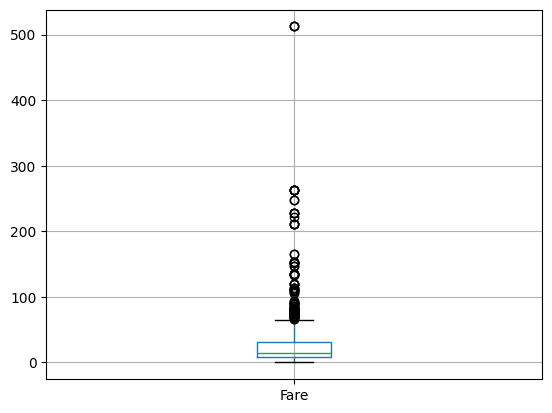

In [22]:
df_dropped.boxplot(column="Fare")
plt.show()

So we need to check prices in each class to see if there is an outlier

In [23]:
df.groupby("Pclass")["Fare"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


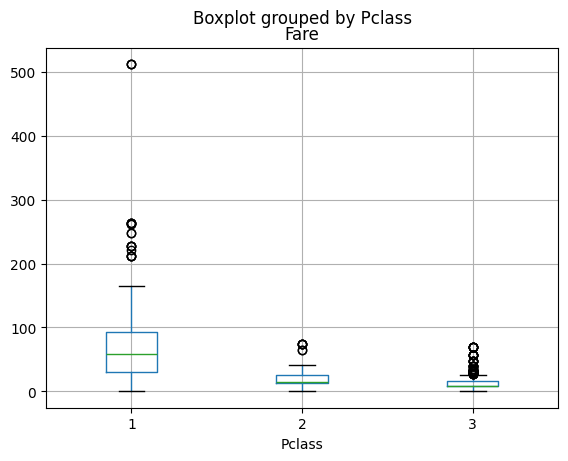

In [24]:
df_dropped.boxplot(column="Fare",by="Pclass")
plt.show()

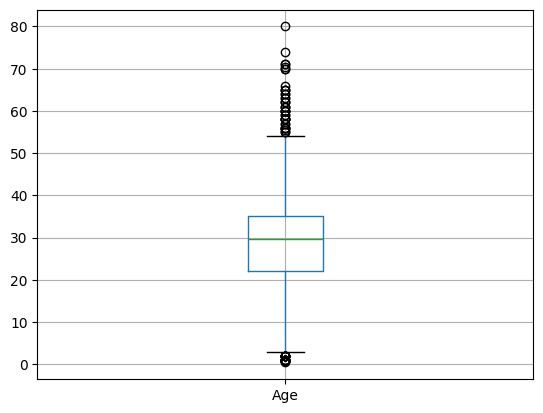

In [25]:
df_dropped.boxplot(column="Age")
plt.show()

We Can detect outliers using histograms as it be seen from the skeweenes (Which part data is leaned to)

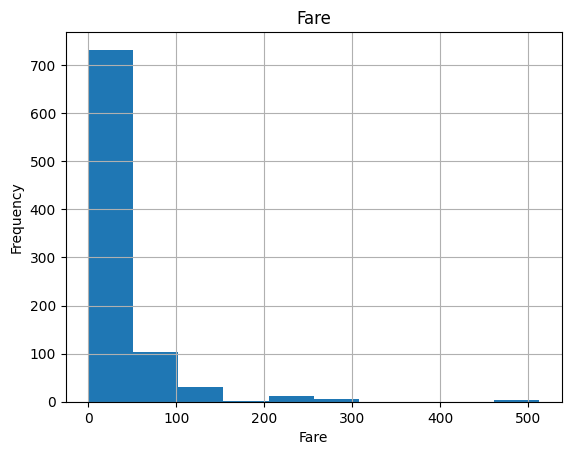

In [26]:
#As seen data is skewed to the right as the mean is affected by the high values 
df_dropped.hist(column="Fare")

plt.xlabel("Fare")
plt.ylabel("Frequency")

plt.show()

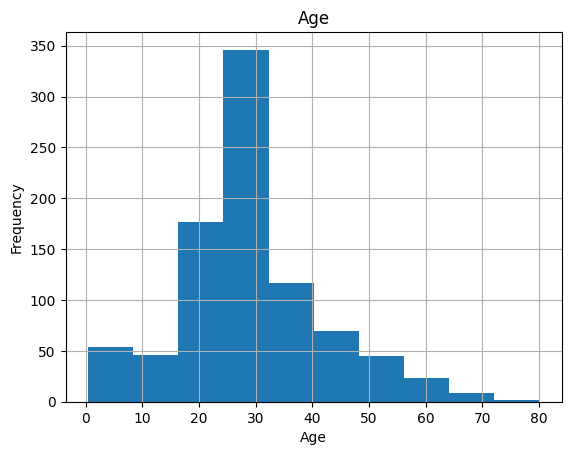

In [27]:
df_dropped.hist(column="Age")

plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

Even though Age and Fair have outliers but we shouldn't remove them as </br>
Age : It is normal to have babies and old people on the ship </br>
Fare : Since there is different Classes as seen and each class must have different pricing rooms it is ok to assume </br>
That the outliers aren't abnormalities </br>
But for the sake of presenting how to handle outliers we will remove them

1- drop the rows that have outliers but that may cause the dropping of important information

Dropping by statistical equations </br>
can get the outlier by calculating Q1, Q3 & IQR

In [28]:
Q1 = df_dropped["Fare"].quantile(0.25)
Q3 = df_dropped["Fare"].quantile(0.75)
IQR = Q3 - Q1
print("Q1 : ", Q1)
print("Q3 : ", Q3)
print("IQR : ", IQR)

Q1 :  7.8958
Q3 :  31.0
IQR :  23.1042


Calculating the upper and lower limit

In [29]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
print("Lower Limit : ", lower_lim)
print("Upper Limit : ", upper_lim)

Lower Limit :  -26.7605
Upper Limit :  65.6563


Checking the rows that are lower than lower limit

In [30]:
outliers_lower = df_dropped["Fare"] < lower_lim
print(outliers_lower)

1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Fare, Length: 889, dtype: bool


Checking the rows that are lower than upper limit

In [31]:
outliers_upper = df_dropped["Fare"] > upper_lim

Filtering outliers from Fare column 

In [32]:
df_no_out = df_dropped["Fare"][~ (outliers_lower | outliers_upper)]
df_no_out

1       7.2500
3       7.9250
4      53.1000
5       8.0500
6       8.4583
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 775, dtype: float64

Only 775 rows are left

In [33]:
df_tmp = df_dropped.copy()
df_tmp["Fare"] = df_no_out
df_tmp = df_tmp.dropna()
df_tmp

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


As you can see the graph is better now

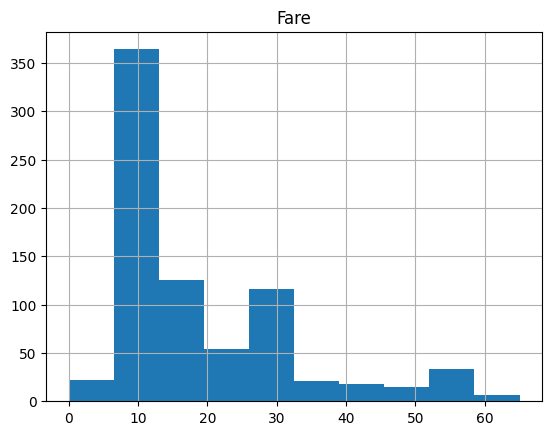

In [34]:
df_tmp.hist(column="Fare")
plt.show()

Dropping from observing box plot 

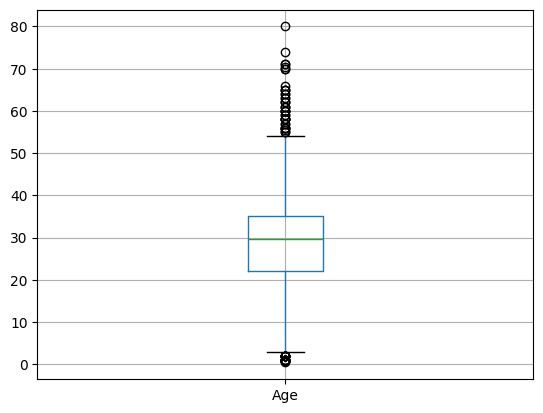

In [35]:
df_dropped.boxplot(column="Age")
plt.show()

We can filter data using whiskers as a limit

In [36]:
df_tmp = df_dropped.copy()
df_tmp = df_tmp[df_tmp["Age"].between(1,53)]

In [37]:
df_tmp

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


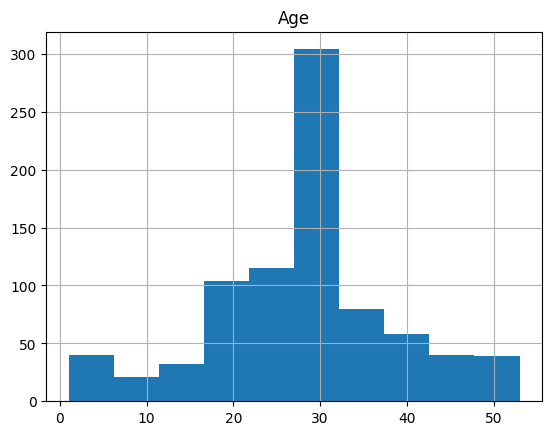

In [38]:
df_tmp.hist(column="Age")
plt.show()

2- Imputating outliers values with mean or median

Calculate the mean or median

In [39]:
import numpy as np

In [40]:
age_median = df_tmp["Age"].median()
age_median

np.float64(29.69911764705882)

Replacing values that outside the boundry of 1 , 52 with the median

In [41]:
df_tmp = df_dropped.copy()
df_tmp["Age"] = df_tmp["Age"].where(df_tmp["Age"].between(1,52), age_median)

Checking the original values to see if it worked successfully

In [42]:
df_dropped[(df_dropped["Age"] > 52) | (df_dropped["Age"] < 1) ]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,S
34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,C
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
95,0,3,"Coxon, Mr. Daniel",male,59.00,0,0,364500,7.2500,S
97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,C
117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,Q
125,0,1,"White, Mr. Percival Wayland",male,54.00,0,1,35281,77.2875,S


In [43]:
df_tmp[df_tmp["Age"] == age_median]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,29.699118,0,0,17463,51.8625,S
12,1,1,"Bonnell, Miss. Elizabeth",female,29.699118,0,0,113783,26.5500,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,29.699118,0,0,248706,16.0000,S
18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,S
...,...,...,...,...,...,...,...,...,...,...
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S
869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,S
879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,29.699118,0,1,11767,83.1583,C


## Incosistent data <a id="in"></a>

Consistent data may have different looks as : </br>
-Inconsistent format </br>
-Filling missing values </br>
-wrong data type .. etc.

In [44]:
df_dropped

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In name column we can extract the title, first and last names to make it more readable

In [45]:
#Splitting the last name from the rest of the string
df_new = df_dropped.copy()
df_new[["Last_Name", "Title_Fname"]] = df_new["Name"].str.split(",",expand=True)
#Stripping the white space
df_new["Last_Name"]= df_new["Last_Name"].str.strip()

In [46]:
#Splitting title from the first name
df_new[["Title", "First_Name"]] = df_new["Title_Fname"].str.split(".",n=1, expand=True)
#Stripping the white spaces
df_new["Title"] = df_new["Title"].str.strip()
df_new["First_Name"] = df_new["First_Name"].str.strip()

In [47]:
#Remove the () and "" from the names 
df_new["First_Name"] = df_new["First_Name"].str.split("(").str[0]
df_new["First_Name"] = df_new["First_Name"].str.split('"').str[0]

In [48]:
#Stripping the white spaces
df_new["First_Name"].str.strip()

1          Owen Harris
2         John Bradley
3                Laina
4        Jacques Heath
5        William Henry
            ...       
887             Juozas
888     Margaret Edith
889    Catherine Helen
890        Karl Howell
891            Patrick
Name: First_Name, Length: 889, dtype: object

In [49]:
#Checking all unique values
df_new["First_Name"].unique()

array(['Owen Harris', 'John Bradley ', 'Laina', 'Jacques Heath ',
       'William Henry', 'James', 'Timothy J', 'Gosta Leonard', 'Oscar W ',
       'Nicholas ', 'Marguerite Rut', 'Elizabeth', 'Anders Johan',
       'Hulda Amanda Adolfina', '', 'Eugene', 'Charles Eugene', 'Julius ',
       'Fatima', 'Joseph J', 'Lawrence', 'Anna ', 'William Thompson',
       'Torborg Danira', 'Carl Oscar ', 'Farred Chehab',
       'Charles Alexander', 'Ellen ', 'Lalio', 'Manuel E',
       'William Augustus ', 'Mary Agatha', 'Edward H', 'Edgar Joseph',
       'Alexander Oskar', 'Hanna', 'Ernest Charles', 'Augusta Maria',
       'Jamila', 'Johan ', 'William John Robert ', 'Theodor',
       'Simonne Marie Anne Andree', 'Margaret Delia', 'William John',
       'Denis', 'Bridget', 'Youssef', 'Josef ', 'Juha Niilo',
       'Richard Cater', 'Henry Sleeper ', 'Lizzie ',
       'Engelhart Cornelius', 'Hugh', 'Emily', 'Mansouer',
       'Constance Mirium', 'William Frederick', 'Orsen',
       'Henry Birkhardt', '

In [50]:
#Drop the intermediate column Title_Fname
df_new = df_new.drop("Title_Fname", axis=1)

In [51]:
df_new

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last_Name,Title,First_Name
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen Harris
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Cumings,Mrs,John Bradley
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques Heath
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Montvila,Rev,Juozas
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Graham,Miss,Margaret Edith
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,Johnston,Miss,Catherine Helen
890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Behr,Mr,Karl Howell


In [52]:
#Reordering the columns to make it more readable
new_order = ["Title", "First_Name","Last_Name","Pclass", "Name", "Sex", "Age", "SibSp", "Parch" , "Ticket" , "Fare" , "Embarked" ,"Survived"]
df_new = df_new[new_order]

In [53]:
df_new

,Title,First_Name,Last_Name,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
1,Mr,Owen Harris,Braund,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0
2,Mrs,John Bradley,Cumings,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
3,Miss,Laina,Heikkinen,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
4,Mrs,Jacques Heath,Futrelle,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
5,Mr,William Henry,Allen,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Rev,Juozas,Montvila,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
888,Miss,Margaret Edith,Graham,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1
889,Miss,Catherine Helen,Johnston,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0
890,Mr,Karl Howell,Behr,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1


Making the ticket in same format as some have letters before them but they are very few so we can't make a column for them </br>
as there will be lots of null values 

Splitting the Ticket column to get only the ticket number

In [54]:
#A warning keeps appearing that I have to make a real copy
df_new = df_new.copy()
#Splitting the Ticket to get the ticket number only
df_new["Ticket_No"] = df_new["Ticket"].str.split(" ").apply(lambda list_ : list_[0] if len(list_) == 1 else list_[1] )

In [55]:
df_new

,Title,First_Name,Last_Name,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Ticket_No
1,Mr,Owen Harris,Braund,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,21171
2,Mrs,John Bradley,Cumings,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,17599
3,Miss,Laina,Heikkinen,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,3101282
4,Mrs,Jacques Heath,Futrelle,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,113803
5,Mr,William Henry,Allen,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Rev,Juozas,Montvila,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,211536
888,Miss,Margaret Edith,Graham,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,112053
889,Miss,Catherine Helen,Johnston,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,6607
890,Mr,Karl Howell,Behr,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,111369


## Incorrect Data Type and Data type casting<a id="data"></a>

We need to check that the data types are right for the column 

Check the data type of each column using info

In [56]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       889 non-null    object 
 1   First_Name  889 non-null    object 
 2   Last_Name   889 non-null    object 
 3   Pclass      889 non-null    int64  
 4   Name        889 non-null    object 
 5   Sex         889 non-null    object 
 6   Age         889 non-null    float64
 7   SibSp       889 non-null    int64  
 8   Parch       889 non-null    int64  
 9   Ticket      889 non-null    object 
 10  Fare        889 non-null    float64
 11  Embarked    889 non-null    object 
 12  Survived    889 non-null    int64  
 13  Ticket_No   889 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 104.2+ KB


As we can see Ticket_No should be int and first name , last name and title should be string

Some ticket numbers had '.' in it

In [57]:
def is_numeric(value):
    try:
        int(value)
        return True
    except ValueError:
        return False

In [58]:
df_new["Ticket_No"] = df_new["Ticket_No"].str.strip()
# df_new["Ticekt_No"] = df_new["Ticket_No"].str.replace(".", "")

df_new["Ticket_No"] = df_new["Ticket_No"].apply(lambda ticket: ticket.replace(".",""))

#Removing non numeric values
df_new = df_new[df_new["Ticket_No"].apply(is_numeric)]

In [59]:
df_new["Ticket_No"].unique()

array(['21171', '17599', '3101282', '113803', '373450', '330877', '17463',
       '349909', '347742', '237736', '9549', '113783', '2151', '347082',
       '350406', '248706', '382652', '244373', '345763', '2649', '239865',
       '248698', '330923', '113788', '347077', '2631', '19950', '330959',
       '349216', '17601', '17569', '335677', '24579', '17604', '113789',
       '2677', '2152', '345764', '2651', '7546', '11668', '349253',
       '2123', '330958', '23567', '370371', '14311', '2662', '349237',
       '3101295', '39886', '17572', '2926', '113509', '19947', '31026',
       '2697', '34651', '2144', '2669', '36973', '347088', '17605',
       '2661', '29395', '3464', '3101281', '315151', '33111', '14879',
       '2680', '1601', '348123', '349208', '374746', '248738', '364516',
       '345767', '345779', '330932', '113059', '14885', '3101278', '6608',
       '392086', '343275', '343276', '347466', '5734', '2315', '364500',
       '374910', '17754', '17759', '231919', '244367', '349

In [60]:
df_new.astype({"Ticket_No": "Int64", "Title": "string", "First_Name": "string", "Last_Name": "string"}).dtypes 

Title         string[python]
First_Name    string[python]
Last_Name     string[python]
Pclass                 int64
Name                  object
Sex                   object
Age                  float64
SibSp                  int64
Parch                  int64
Ticket                object
Fare                 float64
Embarked              object
Survived               int64
Ticket_No              Int64
dtype: object

## Normalization & Scaling <a id="norm"></a>

Making the data in the same range so that all the attributes would affect the model equally. 
</br>
Whether to use normalization or scaling depends on the machine learning model you would use;</br>
Normalization for distance dependent models like :</br>
-K-Nearest Neighbors (KNN)</br>
-K-Means Clustering </br>
Standardization for models that assume the shape of the data like :</br>
-logistic regression</br>
-SVM </br>
There are two way to make the data in the same range each have multiple ways : </br>
* Normalization : It scales the range of attributes between 0 and 1, preferred when the data doesn’t follow any particular shape
* Scaling : It adjusts values to have a mean of 0 and a standard deviation of 1, without necessarily constraining them to a specific range.
  preferred when the data is normally distributed (it follows a bell curve) or you want to transform it to behave like that.

Normalaization : 
* Min-Max : When wanting attributes in the same scale (0,1); useful when using models sensitive to scaling like nueral networks (affected by outliers since it depends on min and max values).
* Max-Abs: Scales the data by the maximum absolute value, preserving the sign so, its useful for financial data to keep the distinction between gains and losses while scaling between (-1, 1).
* L1 Normalization & L2 Normalization : These techniques are commonly used in text classification tasks (like spam detection) where features are word counts. L1 normalization is useful when we want sparse data, while L2 is preferred for dense data representation.
* Decimal Scaling: Used when working with very large numbers as it moves the decimal point as the max number digit count. so it makes them smaller so the caluclation would be easier

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [63]:
# Fit and transform the data
df_tmp = df_new.copy()
df_tmp['Age'] = scaler.fit_transform(df_new[['Age']])

In [64]:
df_tmp

,Title,First_Name,Last_Name,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Ticket_No
1,Mr,Owen Harris,Braund,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,7.2500,S,0,21171
2,Mrs,John Bradley,Cumings,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,71.2833,C,1,17599
3,Miss,Laina,Heikkinen,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,7.9250,S,1,3101282
4,Mrs,Jacques Heath,Futrelle,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,53.1000,S,1,113803
5,Mr,William Henry,Allen,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,8.0500,S,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Rev,Juozas,Montvila,2,"Montvila, Rev. Juozas",male,0.334004,0,0,211536,13.0000,S,0,211536
888,Miss,Margaret Edith,Graham,1,"Graham, Miss. Margaret Edith",female,0.233476,0,0,112053,30.0000,S,1,112053
889,Miss,Catherine Helen,Johnston,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.367921,1,2,W./C. 6607,23.4500,S,0,6607
890,Mr,Karl Howell,Behr,1,"Behr, Mr. Karl Howell",male,0.321438,0,0,111369,30.0000,C,1,111369


Standarization: 
* Z-Score Normalization: Centers the data the mean with a standard deviation of 1; used when data has normal distribution.
* Robust Standardization: Used when there is outliers as it isn't that affected by them as it is calculated using median.
* Log Transformation: Applies the logarithm to compress the data range and stabilize variance.
its useful for skewed data, such as income distribution, to make it more normally distributed.
* Power Transformation: It is similar as the log transformation but it can be used in wider area as it can handle -ve values too

In [65]:
from sklearn.preprocessing import RobustScaler

In [66]:
df_tmp2 = df_new.copy()

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the data
df_tmp2[["Age", "Fare"]] = scaler.fit_transform(df_tmp2[["Age","Fare"]])

In [67]:
df_tmp2

,Title,First_Name,Last_Name,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Ticket_No
1,Mr,Owen Harris,Braund,3,"Braund, Mr. Owen Harris",male,-0.592240,1,0,A/5 21171,-0.312297,S,0,21171
2,Mrs,John Bradley,Cumings,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638529,1,0,PC 17599,2.462711,C,1,17599
3,Miss,Laina,Heikkinen,3,"Heikkinen, Miss. Laina",female,-0.284548,0,0,STON/O2. 3101282,-0.283044,S,1,3101282
4,Mrs,Jacques Heath,Futrelle,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407760,1,0,113803,1.674702,S,1,113803
5,Mr,William Henry,Allen,3,"Allen, Mr. William Henry",male,0.407760,0,0,373450,-0.277627,S,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Rev,Juozas,Montvila,2,"Montvila, Rev. Juozas",male,-0.207624,0,0,211536,-0.063109,S,0,211536
888,Miss,Margaret Edith,Graham,1,"Graham, Miss. Margaret Edith",female,-0.823009,0,0,112053,0.673619,S,1,112053
889,Miss,Catherine Helen,Johnston,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.000000,1,2,W./C. 6607,0.389762,S,0,6607
890,Mr,Karl Howell,Behr,1,"Behr, Mr. Karl Howell",male,-0.284548,0,0,111369,0.673619,C,1,111369


## Categorical Values<a id="cat"></a>

data type in Pandas is used for variables that can take on a limited, fixed number of possible values (categories). </br>
like : ("yes", "no", or "high", "medium", "low"). </br>
In pandas we map each categorical value to a number 

There are two types of data :
* ordinal : order matters 
* nominal : order doesn't matter

We have example in the data for categorical data as survived, parch, sex, embarked </br>
survived, parch ,pclass are taken care of as they are represente by number, </br>
as survived: 0 -> no 1 -> yes

### For ordinal data best way to encode them is giving them number in order either manually or using built in model: </br>
"no time at all":1, </br>
"less than an hour a day":2</br>
"few hours a day":3</br>
"most of the day":4</br>
</br>
from sklearn.preprocessing import OrdinalEncoder</br>
</br>
ordinal_encoder = OrdinalEncoder(categories=[['no time at all', 
                  'less than an hour a day', 
                  'few hours a day', 
                  'most of the day']])


### For Nominal data there is different ways like: 
* Label Encoder: It is good for nominal data as it gives numeric value (label) to the categories; It is good to use it for variables with two categories where one is assigned 0 and other 1. as the binary values will not indicate to the mdoel that there is an order while as if there was more than 2 so it will go on as 0, 1, 2 which would indicate order between them.
* One hot encoding: It would create dummy variables (columns) for each category where it will give 1 if it belongs to the category and 0 other wise;
and it may cause high dimensionality and multicollinearity.
* Frequency Encoding: Where each categorical value is given a number depending on its frequency in the dataframe; Con: some categorical values would have the same value if they have the same frequency
* Mean Encoding (Target Encoding) : It is calculated by the mean of the target variable for a category is assigned to that category; Good with variables with large numbers of categories, and it's informative as it shows relation with target variable and it won't cause high dimensionality; but it may cause overfitting.

Handling sex column using label encoder (As it has only 2 values)

In [68]:
df_new = df_new.copy()
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

df_new["Sex_Encoded"] = label_encoder.fit_transform(df_new["Sex"])
#Male -> 1, Female -> 0
df_new

,Title,First_Name,Last_Name,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Ticket_No,Sex_Encoded
1,Mr,Owen Harris,Braund,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,21171,1
2,Mrs,John Bradley,Cumings,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,17599,0
3,Miss,Laina,Heikkinen,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,3101282,0
4,Mrs,Jacques Heath,Futrelle,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,113803,0
5,Mr,William Henry,Allen,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,373450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Rev,Juozas,Montvila,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,211536,1
888,Miss,Margaret Edith,Graham,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,112053,0
889,Miss,Catherine Helen,Johnston,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,6607,0
890,Mr,Karl Howell,Behr,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,111369,1


Handling Embarked variable

In [69]:
#We can check the frequency of Embarked variable to decide whether to choose frequency encoder
embarked_freq = df_new["Embarked"].value_counts()
embarked_freq

Embarked
S    640
C    167
Q     77
Name: count, dtype: int64

Since there is no repeated frequency we can use it

In [70]:
df_new["Embarked_Encoded"] = df_new["Embarked"].map(embarked_freq)
# S -> 640, C -> 167, Q -> 77
df_new

,Title,First_Name,Last_Name,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Ticket_No,Sex_Encoded,Embarked_Encoded
1,Mr,Owen Harris,Braund,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,21171,1,640
2,Mrs,John Bradley,Cumings,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,17599,0,167
3,Miss,Laina,Heikkinen,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,3101282,0,640
4,Mrs,Jacques Heath,Futrelle,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,113803,0,640
5,Mr,William Henry,Allen,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,373450,1,640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Rev,Juozas,Montvila,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,211536,1,640
888,Miss,Margaret Edith,Graham,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,112053,0,640
889,Miss,Catherine Helen,Johnston,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,6607,0,640
890,Mr,Karl Howell,Behr,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,111369,1,167


## Strings <a id="string"></a>

Pandas provide many functions to manipulate strings data types in pandas
like : split, strip, replace that we have used before

Make the string's letter all small or capital so that the would be in the same format

In [71]:
df_new["Name"].str.lower()

1                                braund, mr. owen harris
2      cumings, mrs. john bradley (florence briggs th...
3                                 heikkinen, miss. laina
4           futrelle, mrs. jacques heath (lily may peel)
5                               allen, mr. william henry
                             ...                        
887                                montvila, rev. juozas
888                         graham, miss. margaret edith
889             johnston, miss. catherine helen "carrie"
890                                behr, mr. karl howell
891                                  dooley, mr. patrick
Name: Name, Length: 884, dtype: object

In [72]:
df_new["Name"].str.upper()

1                                BRAUND, MR. OWEN HARRIS
2      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
3                                 HEIKKINEN, MISS. LAINA
4           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
5                               ALLEN, MR. WILLIAM HENRY
                             ...                        
887                                MONTVILA, REV. JUOZAS
888                         GRAHAM, MISS. MARGARET EDITH
889             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
890                                BEHR, MR. KARL HOWELL
891                                  DOOLEY, MR. PATRICK
Name: Name, Length: 884, dtype: object

Getting length of each string in the dataframe. </br>
This would be especially useful if the tickets should be a certain length so to make sure that there is no wrong or fake tickets

In [73]:
df_new["Ticket_No"].str.len()

1      5
2      5
3      7
4      6
5      6
      ..
887    6
888    6
889    4
890    6
891    6
Name: Ticket_No, Length: 884, dtype: int64

Concatenating two strings together </br>
Concatenating the Port of Embarkation and the number of the ticket

In [74]:
df_new["Embarked"].str.cat(df_new["Ticket_No"], sep="_")

1        S_21171
2        C_17599
3      S_3101282
4       S_113803
5       S_373450
         ...    
887     S_211536
888     S_112053
889       S_6607
890     C_111369
891     Q_370376
Name: Embarked, Length: 884, dtype: object

Checking if the string starts or ends with a certain values </br>
Can be used to checking the consistency of the data if the string must starts or ends with a certain value

Checking the tickets of people embarked in  Cherbourg

In [75]:
df_new["Embarked"].str.cat(df_new["Ticket_No"], sep="_").str.startswith("C") #There is also endswith

1      False
2       True
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890     True
891    False
Name: Embarked, Length: 884, dtype: bool

Repeating each string in the data frame for the amount times you want

In [76]:
df_new["Embarked"].str.repeat(2)

1      SS
2      CC
3      SS
4      SS
5      SS
       ..
887    SS
888    SS
889    SS
890    CC
891    QQ
Name: Embarked, Length: 884, dtype: object

Count the number of the appearance of a certain character

In [77]:
df_new["Ticket_No"].str.count("1")

1      3
2      1
3      2
4      2
5      0
      ..
887    2
888    2
889    0
890    3
891    0
Name: Ticket_No, Length: 884, dtype: int64

Finding a certain letter in a string </br>
If its not found it returns -1 else it returns the character index position for the first occurnce

In [78]:
df_new["First_Name"].str.find("l")

1      -1
2       9
3      -1
4      -1
5       2
       ..
887    -1
888    -1
889    12
890     3
891    -1
Name: First_Name, Length: 884, dtype: int64

We can find all the occurences of a certain character (To know how many numbers it was repeated)

In [79]:
df_new["First_Name"].str.findall("l")

1             []
2            [l]
3             []
4             []
5         [l, l]
         ...    
887           []
888           []
889          [l]
890    [l, l, l]
891           []
Name: First_Name, Length: 884, dtype: object

Checking the state of the string (upper, lower, nuneric)

In [80]:
df_new["Name"].str.isupper()

1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Name, Length: 884, dtype: bool

In [81]:
df_new["Name"].str.islower()

1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Name, Length: 884, dtype: bool

In [82]:
df_new["Ticket"].str.isnumeric() #If one non numeric value is found it returns false

1      False
2      False
3      False
4       True
5       True
       ...  
887     True
888     True
889    False
890     True
891     True
Name: Ticket, Length: 884, dtype: bool

## Data Binning <a id="bin"></a>

A way to smooth the data to remove noises which make the data easier to get info from by grouping numerical values into bins (Groups)

Distance Based Binning: Where you specify the distance of each bin

Binning age column

In [83]:
labels = ["child","teen","young adult","adult","old"]
bins = [0,10,19,30,60,90]

In [84]:
df_new["Age_"] = pd.cut(df_new["Age"], bins=bins, labels=labels)

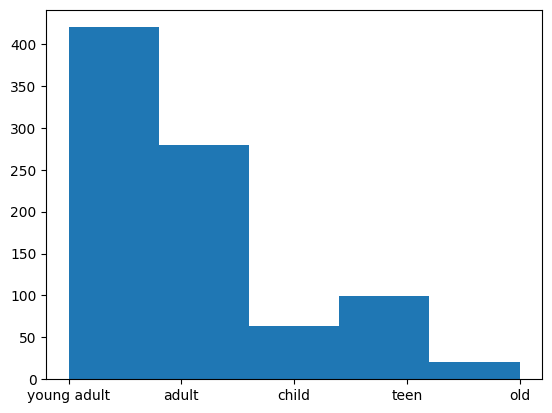

In [85]:
plt.hist(df_new["Age_"],bins=5)
plt.show()

In [86]:
df_new[df_new["Age"].between(30,60)]

,Title,First_Name,Last_Name,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Ticket_No,Sex_Encoded,Embarked_Encoded,Age_
2,Mrs,John Bradley,Cumings,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,17599,0,167,adult
4,Mrs,Jacques Heath,Futrelle,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,113803,0,640,adult
5,Mr,William Henry,Allen,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,373450,1,640,adult
7,Mr,Timothy J,McCarthy,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,17463,1,640,adult
12,Miss,Elizabeth,Bonnell,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,1,113783,0,640,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,Mr,Victor,Vander Cruyssen,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,S,0,345765,1,640,adult
880,Mrs,Thomas Jr,Potter,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,1,11767,0,167,adult
882,Mr,Johann,Markun,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S,0,349257,1,640,adult
886,Mrs,William,Rice,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,382652,0,77,adult


Frequency Based Binning: Where each bin has about the same number of values

In [87]:
df_tmp = df_new.copy()
df_tmp["Age_tmp"] =pd.qcut(df_new['Age'], q=5, precision=1, labels=labels)

In [88]:
df_tmp

,Title,First_Name,Last_Name,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Ticket_No,Sex_Encoded,Embarked_Encoded,Age_,Age_tmp
1,Mr,Owen Harris,Braund,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,21171,1,640,young adult,teen
2,Mrs,John Bradley,Cumings,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,17599,0,167,adult,adult
3,Miss,Laina,Heikkinen,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,3101282,0,640,young adult,teen
4,Mrs,Jacques Heath,Futrelle,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,113803,0,640,adult,adult
5,Mr,William Henry,Allen,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,373450,1,640,adult,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Rev,Juozas,Montvila,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,211536,1,640,young adult,teen
888,Miss,Margaret Edith,Graham,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,112053,0,640,teen,child
889,Miss,Catherine Helen,Johnston,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,6607,0,640,young adult,young adult
890,Mr,Karl Howell,Behr,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,111369,1,167,young adult,teen


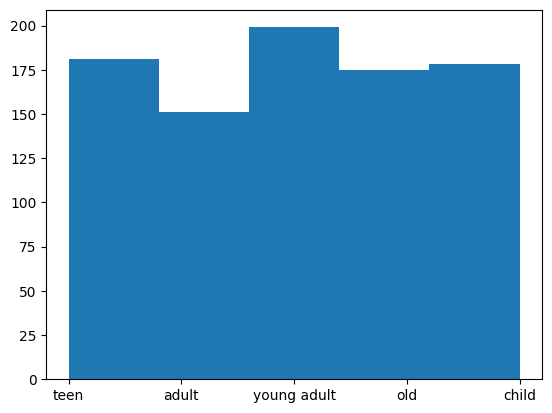

In [89]:
plt.hist(df_tmp["Age_tmp"],bins=5)
plt.show()

Binning by sampling : Replacing each value in a bin with a represntative static to reduce complexity of data (Noise) like : 
* mean : used when there is a lot of noise and you would want to know the general trend like working with temperature sensor and it records data every second so it would better to take mean of each five second interval.
* median : when data has outliers as median is less affected by them.
* bin edges : When you need the boundries data.

## Feature Engineering<a id="feature"></a>

It is multiple of steps to transform raw data to data suitable to train a Machine learning model on

It is making new useful features from existing features like:
* Categorizing values (Like we did before)
* Adding two columns together to make a new feature
* Manipulating a feature to make it into a new column (Like we did in ticket or if we had date data it would better to split it to year , month , day)
* Binning conitnuious values to make them into groups

Other steps like :
* Feature Selection
* Feature Extraction

### Feature Selection

Selecting the important features from the features we have to improve model efficiency

Ways to select features :
Use statistical measures to evaluate the relevance of features.
Examples: Correlation coefficients for contiuous data, Chi-square tests for categorical data ,ANOVA for continuous value with catergoical values that have more than two categorical values.

In [90]:
from sklearn.feature_selection import f_classif, chi2

Encoding Age groups to numbers to put them in categorical values to find their relations
As there would be lots of noise in the continuous data a pattern would be hard to get

In [91]:
values = df_new["Age_"].value_counts()

In [92]:
df_new["Age_Encoding"] = df_new["Age_"].map(values)
df_new

,Title,First_Name,Last_Name,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Ticket_No,Sex_Encoded,Embarked_Encoded,Age_,Age_Encoding
1,Mr,Owen Harris,Braund,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,21171,1,640,young adult,420
2,Mrs,John Bradley,Cumings,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,17599,0,167,adult,280
3,Miss,Laina,Heikkinen,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,3101282,0,640,young adult,420
4,Mrs,Jacques Heath,Futrelle,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,113803,0,640,adult,280
5,Mr,William Henry,Allen,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,373450,1,640,adult,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Rev,Juozas,Montvila,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,211536,1,640,young adult,420
888,Miss,Margaret Edith,Graham,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,112053,0,640,teen,99
889,Miss,Catherine Helen,Johnston,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,6607,0,640,young adult,420
890,Mr,Karl Howell,Behr,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,111369,1,167,young adult,420


Splitting the data to target , categorical columns and continuous columns to know the relation between them

In [93]:
y = df_new["Survived"]
features_category = df_new[["Pclass","Sex_Encoded","SibSp","Parch","Ticket_No","Embarked_Encoded","Age_Encoding"]]
cat_list = ["Pclass","Sex_Encoded","SibSp","Parch","Ticket_No","Embarked_Encoded","Age_Encoding"]
features_continuous = df_new[["Fare"]]

In [94]:
#Checking if the continuos values are imporatnt
f_values, p_values = f_classif(features_continuous, y)

# Printing P_values (if < 0.05 then the siginficance isn't random)
standard_values = [f"{val:.2f}" for val in p_values]
print("ANOVA P_values: ",standard_values)

# Printing f_values (To know if the target and the values are related
print("ANOVA F-test F-values for continuous features:", f_values)

ANOVA P_values:  ['0.00']
ANOVA F-test F-values for continuous features: [61.86690455]


In [95]:
# Calculating the chi score for categorical values to  
chi2_values, chi2_p_values = chi2(features_category, y)

standard_values = [f"{val:.2f}" for val in chi2_p_values]
print("Chi-square P_values: ",standard_values)

# Converting chi2_values to float to be easy to read
standard_values = [f"{val:.2f}" for val in chi2_values]

for i in range(len(cat_list)):
    print("Column: ", cat_list[i], "Chi_Value: ", standard_values[i]) 

Chi-square P_values:  ['0.00', '0.00', '0.12', '0.00', '0.00', '0.00', '0.00']
Column:  Pclass Chi_Value:  30.07
Column:  Sex_Encoded Chi_Value:  91.20
Column:  SibSp Chi_Value:  2.38
Column:  Parch Chi_Value:  10.47
Column:  Ticket_No Chi_Value:  14826571.39
Column:  Embarked_Encoded Chi_Value:  1773.61
Column:  Age_Encoding Chi_Value:  520.31


So we can see the imporant columns we need to select are those of high values and low p_value (< 0.05):
* Pclass
* Sex_Encoded
* Ticket_no
* Embarked_Encoded
* Age_Encoding

In [96]:
df_selected = df_new[["Pclass","Sex_Encoded","Ticket_No","Embarked_Encoded","Age_Encoding","Fare","Survived"]]

As you can see the data became more clear and the features are less

In [97]:
df_selected

,Pclass,Sex_Encoded,Ticket_No,Embarked_Encoded,Age_Encoding,Fare,Survived
1,3,1,21171,640,420,7.2500,0
2,1,0,17599,167,280,71.2833,1
3,3,0,3101282,640,420,7.9250,1
4,1,0,113803,640,280,53.1000,1
5,3,1,373450,640,280,8.0500,0
...,...,...,...,...,...,...,...
887,2,1,211536,640,420,13.0000,0
888,1,0,112053,640,99,30.0000,1
889,3,0,6607,640,420,23.4500,0
890,1,1,111369,167,420,30.0000,1


### Feature Extraction
It is the creation of new features by using original features to reduce the data dimensions (Fix high dimensionality : high number of attributes compared to number of samples like 1000 attribute and a 100 sample). used also when working with unstructerd data like images, videos, text. </br>
One of the most important techniques is PCA (But its more helpful for continuous data). as it creates fewer dimensions to rely on rather than depending on the original ones

We will try them on iris dataset

In [98]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [99]:
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

In [100]:
df_iris = pd.DataFrame(data,columns=iris.feature_names)
df_iris["Species"] = target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


1st step standardize the data as PCA is affected by the data scale

In [101]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_iris.iloc[:,:-1])

Apply PCA to reduce the features from 4D to 2D

In [102]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

Make a dataframe for PCA recults

In [103]:
pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = df_iris['Species']

In [104]:
pca_df

,PC1,PC2,Species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


Knowing what each component represent from the orginal value </br>
by making a dataframe with its components

In [105]:
pca_components = pd.DataFrame(pca.components_,columns=iris.feature_names,index=["PCA1","PCA2"])
pca_components

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PCA1,0.521066,-0.269347,0.580413,0.564857
PCA2,0.377418,0.923296,0.024492,0.066942


Knowing how much of the data does the PCA caputre

In [106]:
explained_variance = pca.explained_variance_ratio_
print("Variance Ratio for each principal component:", explained_variance)

Variance Ratio for each principal component: [0.72962445 0.22850762]


## Data Encoding Issues<a id="encoding_issues"></a>

### What is Data Encoding ?

Two types of encoding:
* Encoding categorical values to numbers (mentioned before)
* Encoding data: the way the text is read in bytes (What languages are supported) </br>
To avoid conflict we can mention the Encoding type
df = pd.read_csv("file.csv", encoding="utf-8")
UTF-8 -> type of encoding that contains most languages

## Data Aggregation and Grouping <a id="agg"></a>

In [107]:
df_new

,Title,First_Name,Last_Name,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Ticket_No,Sex_Encoded,Embarked_Encoded,Age_,Age_Encoding
1,Mr,Owen Harris,Braund,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,21171,1,640,young adult,420
2,Mrs,John Bradley,Cumings,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,17599,0,167,adult,280
3,Miss,Laina,Heikkinen,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,3101282,0,640,young adult,420
4,Mrs,Jacques Heath,Futrelle,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,113803,0,640,adult,280
5,Mr,William Henry,Allen,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,373450,1,640,adult,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Rev,Juozas,Montvila,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,211536,1,640,young adult,420
888,Miss,Margaret Edith,Graham,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,112053,0,640,teen,99
889,Miss,Catherine Helen,Johnston,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,6607,0,640,young adult,420
890,Mr,Karl Howell,Behr,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,111369,1,167,young adult,420


### Data Aggregation

aggregate functions like sum, average (mean), count, minimum, maximum, or median are applied to produce summarized metrics for each group.

Getting the minimum and mean values for fare

In [108]:
df_selected.agg({"Fare": ["min","mean"]})

,Fare
min,0.000000
mean,32.262622


### Grouping with Data Aggregation

We can use aggregate with group by to get useful info

In [109]:
df_new.groupby(["Survived","Embarked"]).agg({"Embarked":"count"})

Embarked
Survived Embarked          
0        C               75
         Q               47
         S              424
1        C               92
         Q               30
         S              216

In [110]:
df_new.groupby(["Survived","Age_"],observed=True).agg({"Age_":"count","Fare":"mean"})

Age_       Fare
Survived Age_                        
0        child          26  34.479165
         teen           58  22.718103
         young adult   283  19.226897
         adult         162  23.365919
         old            17  41.301229
1        child          38  27.666995
         teen           41  47.533744
         young adult   137  37.277158
         adult         118  69.001626
         old             4  32.011450

## Reshaping Data

Process of changing the structure there are different ways like : 
* Pivot : Creating a summary table where we rearranges data by specifying which column should become the rows, which column should become columns and what values to fill in
* melt : Converting wide data to long data (Making columns rows)
* Transpose : Switching rows and column
* Stack : make all columns into one column
* unstack : chossing the 

### Pivot Table

In [111]:
pivot_df = df_new.pivot_table(values="Fare", index="Pclass",columns="Survived",aggfunc="mean")

In [112]:
pivot_df

Survived,0,1
Pclass,,
1,64.684007,95.840984
2,19.412328,22.151793
3,13.780497,13.810946


### Melt

In [113]:
pd.options.display.max_rows = 50

In [114]:
df_melt = df_org.melt(id_vars=["PassengerId","Survived"],
                 value_vars=['Pclass', 'Sex', 'Age', 'Fare'],
                 var_name="Attributes",
                 value_name="Values")
df_melt

,PassengerId,Survived,Attributes,Values
0,1,0,Pclass,3
1,2,1,Pclass,1
2,3,1,Pclass,3
3,4,1,Pclass,1
4,5,0,Pclass,3
...,...,...,...,...
3559,887,0,Fare,13.0
3560,888,1,Fare,30.0
3561,889,0,Fare,23.45
3562,890,1,Fare,30.0


### Transpose

In [115]:
df_transpose = df_new.transpose()
df_transpose

,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Title,Mr,Mrs,Miss,Mrs,Mr,Mr,Mr,Master,Mrs,Mrs,...,Mr,Miss,Mr,Mr,Mrs,Rev,Miss,Miss,Mr,Mr
First_Name,Owen Harris,John Bradley,Laina,Jacques Heath,William Henry,James,Timothy J,Gosta Leonard,Oscar W,Nicholas,...,Johann,Gerda Ulrika,Frederick James,Henry Jr,William,Juozas,Margaret Edith,Catherine Helen,Karl Howell,Patrick
Last_Name,Braund,Cumings,Heikkinen,Futrelle,Allen,Moran,McCarthy,Palsson,Johnson,Nasser,...,Markun,Dahlberg,Banfield,Sutehall,Rice,Montvila,Graham,Johnston,Behr,Dooley
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Markun, Mr. Johann","Dahlberg, Miss. Gerda Ulrika","Banfield, Mr. Frederick James","Sutehall, Mr. Henry Jr","Rice, Mrs. William (Margaret Norton)","Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
Age,22.0,38.0,26.0,35.0,35.0,29.699118,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,29.699118,26.0,32.0
SibSp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
Parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,...,349257,7552,C.A./SOTON 34068,SOTON/OQ 392076,382652,211536,112053,W./C. 6607,111369,370376


### Stacking

In [116]:
df_stack = df_org.stack()

In [117]:
df_stack

1    PassengerId                          1
     Survived                             0
     Pclass                               3
     Name           Braund, Mr. Owen Harris
     Sex                               male
                             ...           
891  SibSp                                0
     Parch                                0
     Ticket                          370376
     Fare                              7.75
     Embarked                             Q
Length: 9826, dtype: object

## Multicollinearity <a id="multi"></a>

It occurs when the independent values(Features) are dependent on each other; in other words they are highly correlated.
How to fix it:
* dropping highly correlated columns using Variance Inflation Factor (VIF)
* Using PCA
* Feature Engineering new feature with the highly correlated features by getting their average

In [118]:
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

Function to calculate the VIF of each column

In [119]:
def vif_arr(df):
    df_tmp = df.copy()
    vif = pd.DataFrame()
    df_tmp = sma.add_constant(df_tmp)
    vif["Features"] = df_tmp.columns
    vif["VIF"] = [variance_inflation_factor(df_tmp.values,i) for i in range(len(df_tmp.columns))]
    return vif

Function is giving errors that there is wrong data type so; as they must be numerical so I am checking for that

In [120]:
df_selected.dtypes

Pclass                 int64
Sex_Encoded            int64
Ticket_No             object
Embarked_Encoded       int64
Age_Encoding        category
Fare                 float64
Survived               int64
dtype: object

In [121]:
df_new = df_selected.astype({"Ticket_No":"int64", "Age_Encoding":"int64"})

In [122]:
df_new.dtypes

Pclass                int64
Sex_Encoded           int64
Ticket_No             int64
Embarked_Encoded      int64
Age_Encoding          int64
Fare                float64
Survived              int64
dtype: object

In [123]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884 entries, 1 to 891
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            884 non-null    int64  
 1   Sex_Encoded       884 non-null    int64  
 2   Ticket_No         884 non-null    int64  
 3   Embarked_Encoded  884 non-null    int64  
 4   Age_Encoding      884 non-null    int64  
 5   Fare              884 non-null    float64
 6   Survived          884 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 87.5 KB


Checking if there is infinite values

In [124]:
print(np.isfinite(df_new.values).all())

True


Calling the function with the dataframes after changing the data types of the dataframe

In [125]:
df_vif = vif_arr(df_new)

As VIF is < 5 in all columns then we don't have multicollinearity problem
VIF interprations : 
* VIF < 5: Generally considered acceptable, indicating that the feature is not highly correlated with other features.
* VIF > 5: May indicate moderate to high multicollinearity.
* VIF > 10: Indicates serious multicollinearity issues and usually suggests that the feature should be investigated further, possibly through removal or transformation.

In [126]:
df_vif

,Features,VIF
0,const,38.469342
1,Pclass,1.623436
2,Sex_Encoded,1.440103
3,Ticket_No,1.100223
4,Embarked_Encoded,1.070576
5,Age_Encoding,1.028362
6,Fare,1.480678
7,Survived,1.597581


## Date and Time Data <a id="date"></a>

In [127]:
df_weather = pd.read_csv(r'dataset/weather.csv')

In [128]:
df_weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


First we can make the date and time column our index so that we can filter rows using certain year or hour so on

In [129]:
df_w2 = df_weather.copy()

In [130]:
df_w2["Date Time"] = pd.to_datetime(df_w2["Formatted Date"], format='%Y-%m-%d %H:%M:%S.%f %z', utc=True) 

In [131]:
df_w2["Date Time"] = df_w2["Date Time"].dt.tz_localize(None)

In [132]:
df_w2

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date Time
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09 17:00:00
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09 18:00:00
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09 19:00:00
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09 20:00:00


We can manipulate the date to extract the year, month and day individually to visualize data yearly, monthly or even daily weather. </br>
As it will be harder to catch trends if we visualized hourly weather.

In [133]:
df_w2["Year"] = df_w2["Date Time"].dt.year
df_w2["Month"] = df_w2["Date Time"].dt.month_name()
df_w2["Day"] = df_w2["Date Time"].dt.day
df_w2

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date Time,Year,Month,Day
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00,2006,March,31
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00,2006,March,31
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00,2006,April,1
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00,2006,April,1
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00,2006,April,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09 17:00:00,2016,September,9
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09 18:00:00,2016,September,9
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09 19:00:00,2016,September,9
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09 20:00:00,2016,September,9


We can feature new features from dates like season column

In [134]:
#Function to get the season
def get_season(date):
    if (date.month == 12) or (date.month < 3):
        return 'Winter'
    elif (date.month >= 3 and date.month<= 5):
        return 'Spring'
    elif (date.month >= 6 and date.month <= 8):
        return 'Summer'
    else:
        return 'Fall'


In [135]:
# Applying the function to create the season column
df_w2['Season'] = df_w2["Date Time"].apply(get_season)

In [136]:
df_w2

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date Time,Year,Month,Day,Season
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00,2006,March,31,Spring
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00,2006,March,31,Spring
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00,2006,April,1,Spring
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00,2006,April,1,Spring
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00,2006,April,1,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09 17:00:00,2016,September,9,Fall
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09 18:00:00,2016,September,9,Fall
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09 19:00:00,2016,September,9,Fall
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09 20:00:00,2016,September,9,Fall


We can make calculations with dates

In [137]:
df_w2.loc[96448 ,"Date Time"] - df_w2.loc[0 ,"Date Time"] 

Timedelta('3814 days 19:00:00')

We can aslo extract the hours, minutes and seconds

In [138]:
df_w2["Hours"] = df_w2["Date Time"].dt.hour
df_w2["Minutes"] = df_w2["Date Time"].dt.minute
df_w2["Seconds"] = df_w2["Date Time"].dt.second

In [139]:
df_w2

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date Time,Year,Month,Day,Season,Hours,Minutes,Seconds
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00,2006,March,31,Spring,22,0,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00,2006,March,31,Spring,23,0,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00,2006,April,1,Spring,0,0,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00,2006,April,1,Spring,1,0,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00,2006,April,1,Spring,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09 17:00:00,2016,September,9,Fall,17,0,0
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09 18:00:00,2016,September,9,Fall,18,0,0
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09 19:00:00,2016,September,9,Fall,19,0,0
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09 20:00:00,2016,September,9,Fall,20,0,0


We can add certain time period to our date

In [140]:
new_date = df_w2['Date Time'] + pd.Timedelta(days=30)

In [141]:
new_date - df_w2["Date Time"]

0       30 days
1       30 days
2       30 days
3       30 days
4       30 days
          ...  
96448   30 days
96449   30 days
96450   30 days
96451   30 days
96452   30 days
Name: Date Time, Length: 96453, dtype: timedelta64[ns]

We can set the date time as index to manipulate the data using dates

In [142]:
df_w2 = df_w2.set_index("Date Time")

In [143]:
df_w2

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Season,Hours,Minutes,Seconds
Date Time,,,,,,,,,,,,,,,,,,,
2006-03-31 22:00:00,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,March,31,Spring,22,0,0
2006-03-31 23:00:00,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,March,31,Spring,23,0,0
2006-04-01 00:00:00,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,April,1,Spring,0,0,0
2006-04-01 01:00:00,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,April,1,Spring,1,0,0
2006-04-01 02:00:00,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,April,1,Spring,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016,September,9,Fall,17,0,0
2016-09-09 18:00:00,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016,September,9,Fall,18,0,0
2016-09-09 19:00:00,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016,September,9,Fall,19,0,0


In [144]:
df_w2.sort_index(inplace=True)

We can slice the dataframe using specific date range

In [145]:
df_w2["2005-12-31" : "2007-10-01"]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Season,Hours,Minutes,Seconds
Date Time,,,,,,,,,,,,,,,,,,,
2005-12-31 23:00:00,2006-01-01 00:00:00.000 +0100,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.,2005,December,31,Winter,23,0,0
2006-01-01 00:00:00,2006-01-01 01:00:00.000 +0100,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.,2006,January,1,Winter,0,0,0
2006-01-01 01:00:00,2006-01-01 02:00:00.000 +0100,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.,2006,January,1,Winter,1,0,0
2006-01-01 02:00:00,2006-01-01 03:00:00.000 +0100,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.,2006,January,1,Winter,2,0,0
2006-01-01 03:00:00,2006-01-01 04:00:00.000 +0100,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.,2006,January,1,Winter,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-10-01 19:00:00,2007-10-01 21:00:00.000 +0200,Partly Cloudy,rain,16.850000,16.850000,0.60,7.5992,49.0,9.9820,0.0,1025.54,Partly cloudy throughout the day.,2007,October,1,Fall,19,0,0
2007-10-01 20:00:00,2007-10-01 22:00:00.000 +0200,Partly Cloudy,rain,13.216667,13.216667,0.73,6.1502,30.0,15.8263,0.0,1025.82,Partly cloudy throughout the day.,2007,October,1,Fall,20,0,0
2007-10-01 21:00:00,2007-10-01 23:00:00.000 +0200,Mostly Cloudy,rain,13.383333,13.383333,0.74,6.7620,56.0,14.9569,0.0,1025.69,Partly cloudy throughout the day.,2007,October,1,Fall,21,0,0


## Data Merging and Joining <a id="merge"></a>

### Data Merging
It provides flexible way to combine two DataFrames by matching rows based on one or more columns. It’s similar to SQL joins (INNER, LEFT, RIGHT, OUTER) and allows you to specify the columns (or keys) on which you want to merge.

In [146]:
#Merging two tables 
df1 = pd.DataFrame({'name': ['mariam', 'mostafa', 'omnia'],
                    'no': [1, 2, 3],
                      'diff': ["a","b","c"]})
df2 = pd.DataFrame({'name': ['nadeen', 'mostafa', 'omnia','yara'],
                    'no': [1, 2, 3,6],
                      'different' : ["d","e","f","g"]})
print(df1)
print(df2)

      name  no diff
0   mariam   1    a
1  mostafa   2    b
2    omnia   3    c
      name  no different
0   nadeen   1         d
1  mostafa   2         e
2    omnia   3         f
3     yara   6         g


Inner: gets only the values that exists in both (Intersection)

In [147]:
#inner
print("\nInner:")
print(df1.merge(df2,on="name"))


Inner:
      name  no_x diff  no_y different
0  mostafa     2    b     2         e
1    omnia     3    c     3         f


Left: Gets The values that exists in the left table and if there was no match in right table put Nan 

In [148]:
#left
print("\nLeft:")
print(df1.merge(df2,how="left",on="no"))


Left:
    name_x  no diff   name_y different
0   mariam   1    a   nadeen         d
1  mostafa   2    b  mostafa         e
2    omnia   3    c    omnia         f


Right: Gets all values in the right table and if not match found in left table put Nan in the value 

If we don't mention the column to merge with it will merge with columns with the same name

In [149]:
#right
print("\nRight:")
print(df1.merge(df2,how="right"))


Right:
      name  no diff different
0   nadeen   1  NaN         d
1  mostafa   2    b         e
2    omnia   3    c         f
3     yara   6  NaN         g


Cross: Each value in the left table is matched with every value in the right table

In [150]:
#cross
print("\nCross:")
print(df1.merge(df2,how="cross"))


Cross:
     name_x  no_x diff   name_y  no_y different
0    mariam     1    a   nadeen     1         d
1    mariam     1    a  mostafa     2         e
2    mariam     1    a    omnia     3         f
3    mariam     1    a     yara     6         g
4   mostafa     2    b   nadeen     1         d
5   mostafa     2    b  mostafa     2         e
6   mostafa     2    b    omnia     3         f
7   mostafa     2    b     yara     6         g
8     omnia     3    c   nadeen     1         d
9     omnia     3    c  mostafa     2         e
10    omnia     3    c    omnia     3         f
11    omnia     3    c     yara     6         g


### Data Joining
It is specifically designed to join two DataFrames based on their index; The types works the same as in merge but just on index

As you can see trying to join on column isn't showing the result as we want it

In [151]:
df1.join(df2,how="right", lsuffix='_left', rsuffix='_right')

,name_left,no_left,diff,name_right,no_right,different
0,mariam,1.0,a,nadeen,1,d
1,mostafa,2.0,b,mostafa,2,e
2,omnia,3.0,c,omnia,3,f
3,NaN,NaN,NaN,yara,6,g


In [152]:
df1.set_index("no",inplace=True)
df2.set_index("no",inplace=True)
print(df1)
print(df2)

       name diff
no              
1    mariam    a
2   mostafa    b
3     omnia    c
       name different
no                   
1    nadeen         d
2   mostafa         e
3     omnia         f
6      yara         g


Inner Join

In [153]:
df1.join(df2,how="inner", lsuffix='_left', rsuffix='_right')

,name_left,diff,name_right,different
no,,,,
1,mariam,a,nadeen,d
2,mostafa,b,mostafa,e
3,omnia,c,omnia,f


Left Join

In [154]:
df1.join(df2,how="left", lsuffix='_left', rsuffix='_right')

,name_left,diff,name_right,different
no,,,,
1,mariam,a,nadeen,d
2,mostafa,b,mostafa,e
3,omnia,c,omnia,f


Right Join

In [155]:
df1.join(df2,how="right", lsuffix='_left', rsuffix='_right')

,name_left,diff,name_right,different
no,,,,
1,mariam,a,nadeen,d
2,mostafa,b,mostafa,e
3,omnia,c,omnia,f
6,NaN,NaN,yara,g


Cross Join

In [156]:
df1.join(df2,how="cross", lsuffix='_left', rsuffix='_right')

,name_left,diff,name_right,different
0,mariam,a,nadeen,d
1,mariam,a,mostafa,e
2,mariam,a,omnia,f
3,mariam,a,yara,g
4,mostafa,b,nadeen,d
5,mostafa,b,mostafa,e
6,mostafa,b,omnia,f
7,mostafa,b,yara,g
8,omnia,c,nadeen,d
9,omnia,c,mostafa,e


## Sparse Data <a id="sparse"></a>

It refers to datasets where most of the entries don’t contain significant information, these are zeros or null-like values. Sparse data can be described mathematically by something called the sparsity ratio; the proportion of zero-valued elements in your dataset. For example, if 95% of the values in a matrix are zero, it’s considered sparse Which would causes waste in memory and decrease models efficiency (Increase the time the model takes). </br>
Ways to handle them:
* Keeping only the non-zero (Important) data
* Dimensionality reduction like PCA
* Filling missing data (and when zeros mean missing data)
* Dropping the whole column if needed (The column isn't important)

### Keeping only the important data 
Using data structures responsible for storing sparse data as Compressed Sparse Row (CSR) Matrices

In [157]:
from scipy.sparse import csr_matrix

In [158]:
# Where 0 -> Didn't read the boook , 1 -> read it
# We only care about the read books
data = {
    'Person': ['Alice', 'Bob', 'Charlie'],
    'Book 1': [1, 0, 0],
    'Book 2': [0, 0, 0],
    'Book 3': [0, 1, 0],
    'Book 4': [1, 0, 0],
}

df = pd.DataFrame(data)
df.set_index("Person",inplace=True)

df

,Book 1,Book 2,Book 3,Book 4
Person,,,,
Alice,1,0,0,1
Bob,0,0,1,0
Charlie,0,0,0,0


In [159]:
data_sparse = csr_matrix(df)

In [160]:
print("Original Data:\n", df)

Original Data:
          Book 1  Book 2  Book 3  Book 4
Person                                 
Alice         1       0       0       1
Bob           0       0       1       0
Charlie       0       0       0       0


As you can see it only store the non-zero values

In [161]:
print("Sparse Matrix:\n", data_sparse)

Sparse Matrix:
 <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (3, 4)>
  Coords	Values
  (0, 0)	1
  (0, 3)	1
  (1, 2)	1


If the row and column of the data want to be known we can use the indices to find them

The Values that are stored in the matrix

In [162]:
data = data_sparse.data

To Get the row and column indices

In [163]:
row_indices, col_indices = data_sparse.nonzero()

In [164]:
row_labels = df.index[row_indices].tolist()
col_labels = df.columns[col_indices].tolist()

In [165]:
df_non_zero = pd.DataFrame({
    "Person": row_labels,
    "Books": col_labels,
    "Values": data
})
df_non_zero

,Person,Books,Values
0,Alice,Book 1,1
1,Alice,Book 4,1
2,Bob,Book 3,1
